In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

#### 5.1 散点图

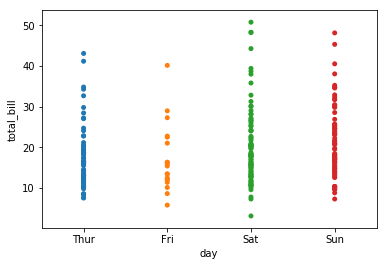

In [4]:
sns.stripplot(x="day", y="total_bill", data=tips);

重叠是很常见的现象，但是重叠影响我观察数据的量了，一个简单的解决办法是加入 jitter 参数，调整横坐标位置：

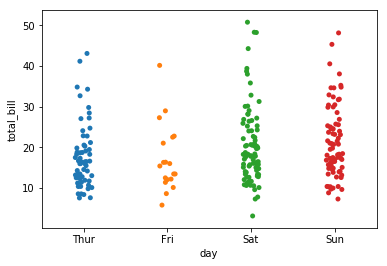

In [5]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

避免所有的重合数据

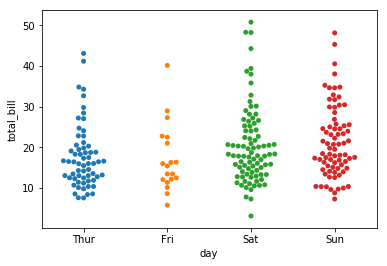

In [6]:
sns.swarmplot(x="day", y="total_bill", data=tips)

通过 hue 参数加入另一个嵌套的分类变量，而且嵌套的分类变量可以以不同的颜色区别

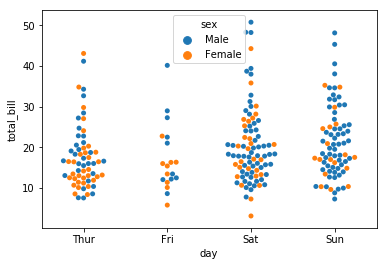

In [7]:
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips)

seaborn 会尝试推断出分类变量的顺序。  
数据是 pandas 的分类数据类型，那么就是使用默认的分类数据顺序，如果是其他的数据类型，字符串类型的类别将按照它们在DataFrame中显示的顺序进行绘制，但是数组类别将被排序：

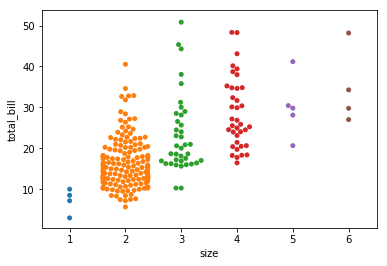

In [8]:
sns.swarmplot(x="size", y="total_bill", data=tips);

将变量放在垂直轴上是非常有用的（当类别名称相对较长或有很多类别），可以使用 orient 关键字强制定向，但通常可以互换x和y的变量的数据类型来完成

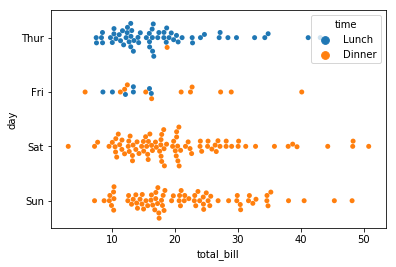

In [11]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips)

#### 5.2 盒图 

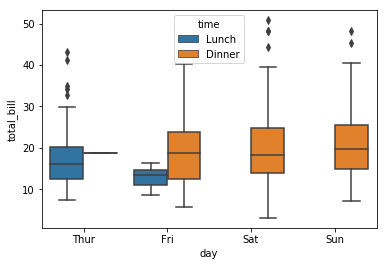

In [12]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

使用 hue 参数的假设是这个变量嵌套在x或者y轴内。所以默认的情况下，hue 变量的不同类型值会保持偏置状态（两类或几类数据共同在x轴数据类型的一个类中），就像上面那个图所示。但是如果 hue 所使用的变量不是嵌套的，那么你可以使用 dodge 参数来禁止这个默认的偏置状态。

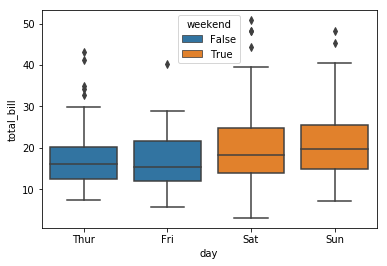

In [13]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False)

#### 5.3 提琴图

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


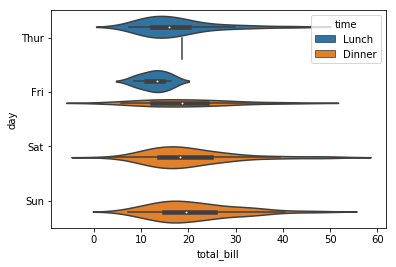

In [14]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

这种方法使用核密度估计来更好地描述值的分布。此外，小提琴内还显示了箱体四分位数和四分位距。由于小提琴使用KDE，还有一些其他可以调整的参数，相对于简单的boxplot增加了一些复杂性：


/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


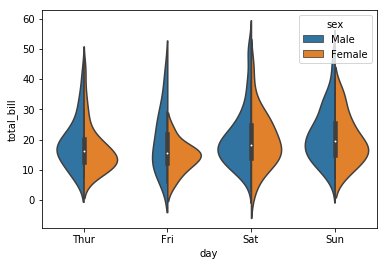

In [15]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

可以在提琴图内使用 inner 参数以横线的形式来展示每个观察点的分布，来代替箱型的整体分布：

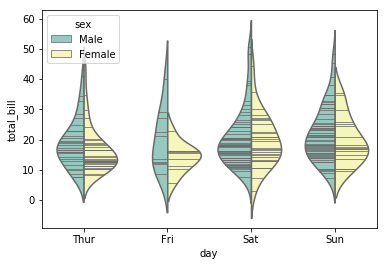

In [16]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner="stick", palette="Set3")

可以将 swarmplot()，violinplot()，或 boxplot() 混合使用，这样可以结合多种绘图的特点展示更完美的效果：

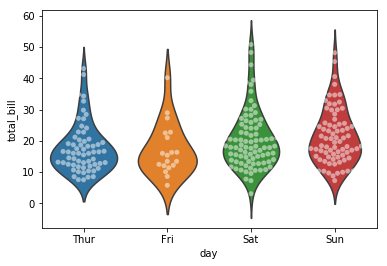

In [17]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)

#### 5.4 分类数据统计估计图
Seaborn中 barplot() 函数会在整个数据集上显示估计，默认情况下使用均值进行估计。 当在每个类别中有多个类别时（使用了 hue），它可以使用引导来计算估计的置信区间，并使用误差条来表示置信区间：

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


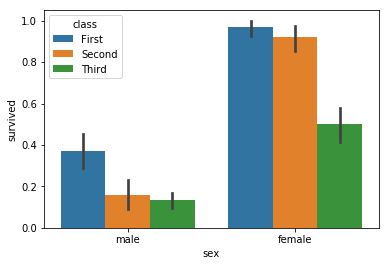

In [18]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

条形图的特殊情况是当想要显示每个类别的数量，而不是计算统计量，使用 countplot() 函数：

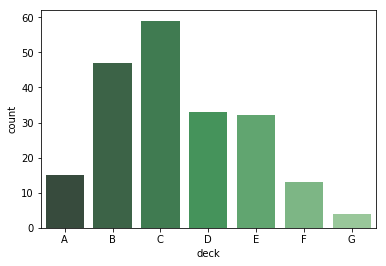

In [19]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")

#### 5.5 点图可以更好的描述变化差异

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


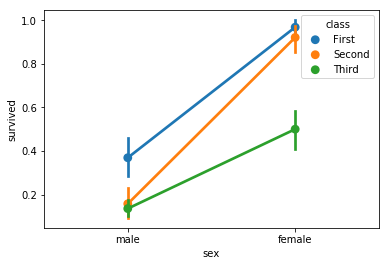

In [20]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


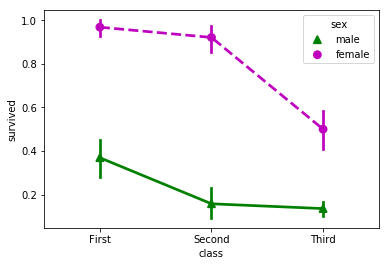

In [21]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

#### 5.6 多层面板分类图 

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


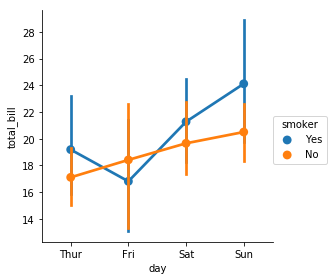

In [23]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips)

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


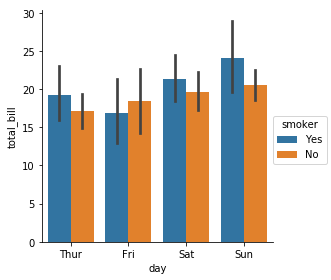

In [24]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")

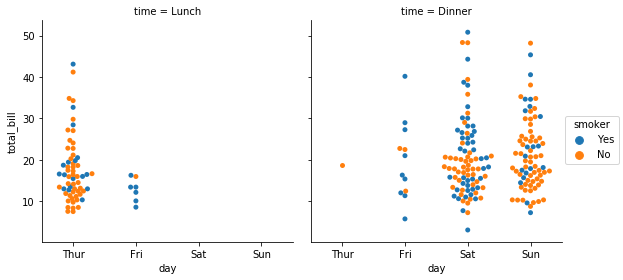

In [25]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm")

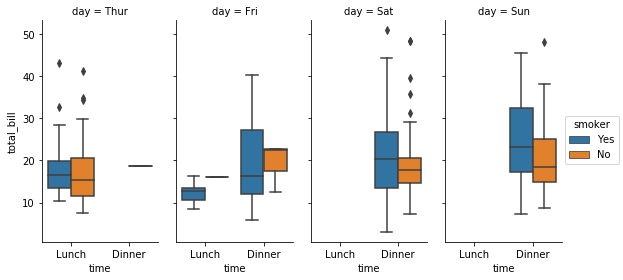

In [26]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5)